In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Neceitamos construir un sampler

In [3]:
Fs = 2000      # Frecuencia de muestreo
tstep = 1 / Fs # intervalo de tiempo de muestreo
f0 = 100 # Signal frequency

N = int (Fs / f0)       # Numero de muestras

N = int (10 * Fs / f0)  # Podemos hacer mas ciclos

In [4]:
t = np.linspace(0, (N-1)*tstep, int(N))
#print(t)

In [5]:
fstep = Fs / N # Intervalo de frecuencias
freq = np.linspace(0, (N-1)*fstep, int(N))
#print(freq)

In [6]:
def GetSample(t,A,f0,modos=1):
    
  #  y = np.sqrt(t)
    y = 1.0 * A * np.sin(2 * np.pi * ( 1 * f0 ) * t)
        
    if modos == 2:
        y += 0.5 * A * np.sin( 2 * np.pi * ( 3 * f0) * t )
    elif modos == 3: 
        y += 0.5 * A * np.sin( 2 * np.pi * ( 3 * f0) * t )
        y += 4.0 * A * np.sin( 2 * np.pi * ( 4 * f0) * t )
        
    return y

In [7]:
y = GetSample(t,1,f0,3)

In [8]:
# Calculamos la fft
X = np.fft.fft(y)
XMag = np.abs(X) / len(y)

In [9]:
# Por el problema de nyquist:
#Si tenemos una frecuencia de muestreo de 2000, podemos recontruir una frecuencia igual o menor a la mitad de dicha frecuencia. 

In [10]:
freq2 = freq[0:int(N/2+1)]
XMag2 = 2.0*XMag[0:int(N/2+1)]
XMag2[0] = XMag2[0] / 2 

Text(0.5, 0, 'Frequency[Hz]')

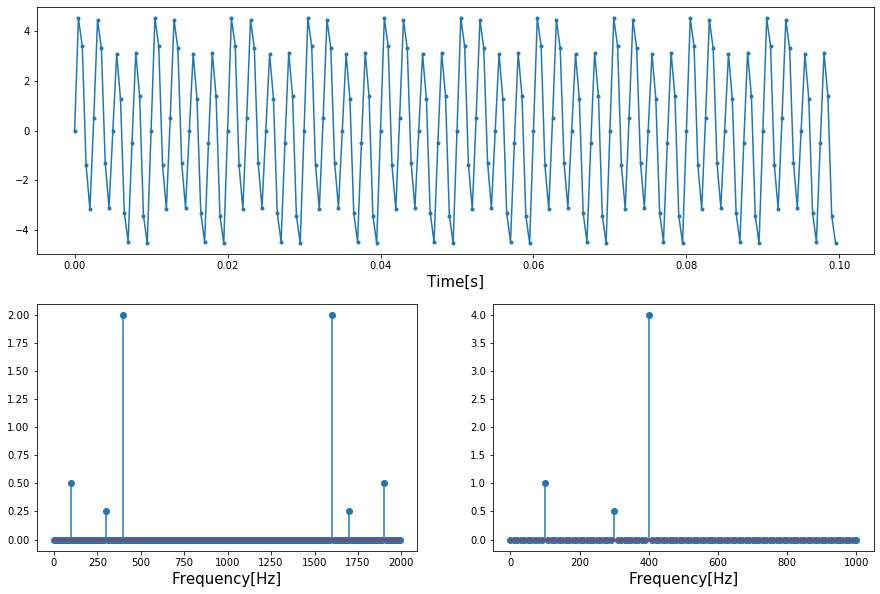

In [11]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
ax.plot(t,y,'.-')
ax.set_xlabel('Time[s]', fontsize=15)
ax1.stem(freq,XMag,'.-',use_line_collection='True')
ax1.set_xlabel('Frequency[Hz]', fontsize=15)
ax2.stem(freq2,XMag2,'.-',use_line_collection='True')
ax2.set_xlabel('Frequency[Hz]', fontsize=15)

In [12]:
# Construimos una mascara
mask1 = freq > 350   

In [13]:
X[mask1] = 0

In [14]:
XMag_ = np.abs(X) / len(y)
XMag2_ = 2.0*XMag_[0:int(N/2+1)]
XMag2_[0] = XMag2_[0] / 2 

Text(0.5, 0, 'Frequency[Hz]')

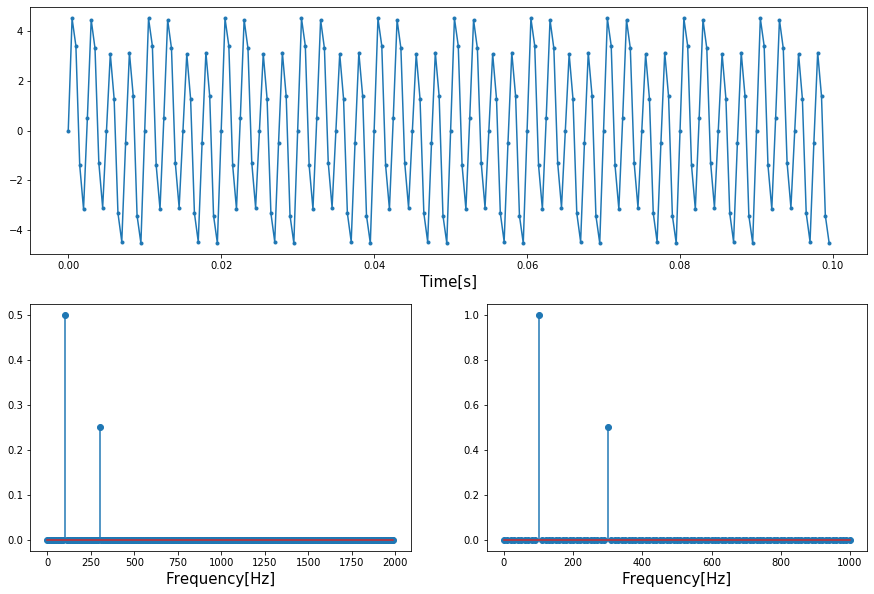

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
ax.plot(t,y,'.-')
ax.set_xlabel('Time[s]', fontsize=15)
ax1.stem(freq,XMag_,'.-',use_line_collection='True')
ax1.set_xlabel('Frequency[Hz]', fontsize=15)
ax2.stem(freq2,XMag2_,'.-',use_line_collection='True')
ax2.set_xlabel('Frequency[Hz]', fontsize=15)

In [16]:
NewSample = np.fft.ifft(2*X)

In [17]:
y1 = GetSample(t,1,f0,2)

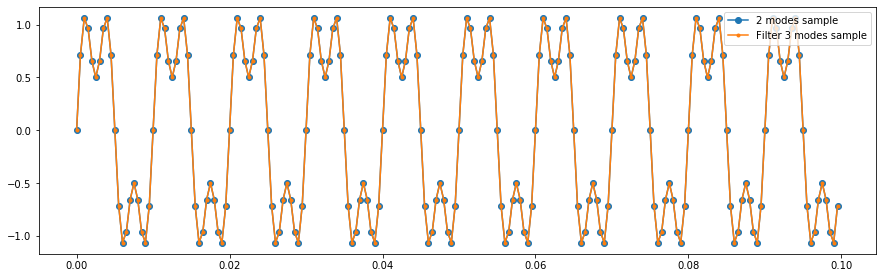

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax.plot(t,y1,marker='o',label='2 modes sample')
ax.plot(t,np.real(NewSample),'.-',label='Filter 3 modes sample')
plt.legend(loc=1)